# Импорт данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
RAND = 26



Целью проекта является прогнозирование цены за один квадратный метр.<br>
<br>
    Для проекта я выбрал квартиры на сайте ЦИАН. Параметры по которым я выбирал квартиры: в г. Москва, до 5 комнат включительно, для проживания. по 100 квартир на каждую станцию метро из 150 выбранных станций.<br>
<br>
<b>Наименование признаков -</b> <br>
- Название - Название объявления<br>
- Адрес - Адрес квартиры<br>
- Метро - Ближайшая станция метро<br>
- Время до метро - Время до ближайшей станции метро (мин)<br>
- Цена - Цена за квартиру (руб)<br>
- <b>Цена за квадрат - Цена за квадратный метр (руб) (Целевой признак)</b><br>
- Общая площадь - Общая площадь (кв. метры)<br>
- Жилая площадь - Жилая площадь (кв. метры)<br>
- Площадь кухни - Площадь кухни (кв. метры)<br>
- Этаж - Номер этажа из всех этажей дома <br>
- Год постройки - Год постройки дома<br>
- Тип жилья - Вторичка или новостройка <br>
- Высота потолков - Высота потолков (метры) <br>
- Санузел - Количество и тип санузлов<br>
- Вид из окон - Вид из окон<br>
- Ремонт - Тип римонта<br>
- Строительная серия - Строительная серия<br>
- Мусоропровод - Наличие мусоропровода <br>
- Количество лифтов - количество лифтов в доме<br>
- Тип дома - Тип дома<br>
- Тип перекрытий - Тип перекрытий<br>
- Парковка - Вид парковки<br>
- Подъезды - Количество подъездов<br>
- Отопление - Тип отопления<br>
- Аварийность - Аварийность<br>
- Газоснабжение - Наличие газоснабжения<br>
- Балкон/лоджия - Количество и тип балкона/лоджии<br>
- Год сдачи - Год сдачи квартир в доме<br>
- Дом - Сдан или нет<br>
- Отделка - Тип отделки <br>
- Кол-во комнат - количество комнат в квартире.<br>
- Широта метро, долгота метро - координаты метро <br>
- Широта дома, долго дома - координаты дома <br>
- Расстояние до метро, расстояние до центра - Расстояния до ближайшего метро и центра Москвы соответсвенно.
- Округ - Округ Москвы в котором находится квартира.



<font size="4">Проведем разведочный анализ данных и выдвинем гипотезы.</font>


In [2]:
# Настройки matpotlib
plt.rcParams["figure.figsize"] = 12, 6
plt.rcParams["axes.titlesize"] = 130
plt.rcParams["font.size"] = 10

sns.set_theme()

sns.set_palette("viridis")

In [3]:
df = pd.read_csv("data\cian_full.csv")
df

,Название,Адрес,Метро,Время до метро,Цена,Цена за квадрат,Общая площадь,Жилая площадь,Площадь кухни,Этаж,...,Отделка,Этажность здания,Кол-во комнат,широта метро,долгота метро,широта дома,долгота дома,Расстояние до центра,Расстояние до метро,Округ
0,"5-комн. квартира, 140,6 м²","Москва, ЦАО, р-н Тверской, ул. Петровка, 20/1",Трубная,5,82000000.0,583215.0,140.6,81.600,15.600,5,...,Неизвестно,5,5,55.767833,37.622028,55.764222,37.617321,1.205890,0.498928,ЦАО
1,"5-комн. квартира, 200 м²","Москва, ЦАО, р-н Тверской, Тверская ул., 12С7",Пушкинская,3,75000000.0,375000.0,200.0,120.000,20.000,6,...,Неизвестно,6,5,55.765752,37.603900,55.763908,37.608742,1.383347,0.366782,ЦАО
2,"4-комн. апартаменты, 207,9 м²","Москва, ЦАО, р-н Тверской, ул. Охотный Ряд, 2",Охотный ряд,2,454889566.0,2188021.0,207.9,122.661,35.343,5,...,Неизвестно,15,4,55.756969,37.615524,55.757131,37.617114,0.464192,0.101442,ЦАО
3,"4-комн. апартаменты, 204,6 м²","Москва, ЦАО, р-н Тверской, ул. Охотный Ряд, 2",Охотный ряд,2,508714883.0,2486388.0,204.6,120.714,34.782,6,...,Неизвестно,15,4,55.756969,37.615524,55.757131,37.617114,0.464192,0.101442,ЦАО
4,"5-комн. квартира, 264,6 м²","Москва, ЦАО, р-н Тверской, ул. Большая Дмитров...",Театральная,5,450000000.0,1700680.0,264.6,156.114,30.000,7,...,Неизвестно,7,5,55.757967,37.619001,55.760849,37.614743,0.898965,0.417634,ЦАО
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10762,"2-комн. апартаменты, 67 м²","Москва, Новоалексеевская ул., 16к2",Алексеевская,7,33000000.0,492537.0,67.0,30.000,25.000,6,...,Неизвестно,18,2,55.807805,37.638737,55.809004,37.647091,6.382136,0.540548,СВАО
10763,"2-комн. квартира, 58,9 м²","Москва, СЗАО, р-н Покровское-Стрешнево, Северо...",Спартак,16,20700000.0,351443.0,58.9,23.700,15.600,14,...,Без отделки,24,2,55.818103,37.435250,55.816136,37.422988,14.243119,0.799259,СЗАО
10764,"2-комн. квартира, 54 м²","Москва, ЮЗАО, р-н Южное Бутово, ул. Адмирала Р...",Бунинская аллея,6,14800000.0,274074.0,54.0,30.000,9.000,10,...,Неизвестно,14,2,55.537969,37.515928,55.540363,37.521462,24.554003,0.439437,ЮЗАО
10765,"1-комн. квартира, 37 м²","Москва, ЮАО, р-н Царицыно, Бакинская ул., 27",Царицыно,10,10900000.0,294595.0,37.0,20.000,8.200,10,...,Неизвестно,16,1,55.621607,37.669154,55.618069,37.658482,15.271700,0.779263,ЮАО


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10767 entries, 0 to 10766
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Название              10767 non-null  object 
 1   Адрес                 10767 non-null  object 
 2   Метро                 10767 non-null  object 
 3   Время до метро        10767 non-null  int64  
 4   Цена                  10767 non-null  float64
 5   Цена за квадрат       10767 non-null  float64
 6   Общая площадь         10767 non-null  float64
 7   Жилая площадь         10767 non-null  float64
 8   Площадь кухни         10767 non-null  float64
 9   Этаж                  10767 non-null  int64  
 10  Год постройки         10767 non-null  int64  
 11  Тип жилья             10767 non-null  object 
 12  Высота потолков       10767 non-null  float64
 13  Санузел               10767 non-null  int64  
 14  Вид из окон           10767 non-null  object 
 15  Ремонт             

In [5]:
df.describe()

,Время до метро,Цена,Цена за квадрат,Общая площадь,Жилая площадь,Площадь кухни,Этаж,Год постройки,Высота потолков,Санузел,Количество лифтов,Балкон/лоджия,Этажность здания,Кол-во комнат,широта метро,долгота метро,широта дома,долгота дома,Расстояние до центра,Расстояние до метро
count,10767.000000,1.076700e+04,1.076700e+04,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000
mean,9.537568,4.511170e+07,4.847918e+05,72.032823,42.171332,12.423812,8.248073,1991.220581,2.927765,1.353859,2.026470,1.100399,15.867837,2.284573,55.733546,37.607612,55.733462,37.607624,9.185302,0.835991
std,5.296262,8.713723e+07,3.715630e+05,50.396540,31.169376,8.647969,7.772449,32.983058,0.604028,0.675312,1.586957,0.360154,11.661294,1.039802,0.077507,0.095100,0.077921,0.096531,5.776884,0.732046
min,1.000000,2.390000e+06,7.350900e+04,11.000000,3.000000,1.000000,1.000000,1822.000000,2.000000,1.000000,0.000000,1.000000,2.000000,1.000000,55.470459,37.138168,55.476296,37.123607,0.264411,0.038763
25%,5.000000,1.350000e+07,2.900000e+05,42.000000,22.800000,7.058400,3.000000,1968.000000,2.700000,1.000000,1.000000,1.000000,9.000000,1.000000,55.690080,37.540129,55.686692,37.540560,4.491384,0.456791
50%,9.000000,1.990000e+07,3.678160e+05,58.000000,33.400000,10.000000,6.000000,2002.000000,2.850000,1.000000,2.000000,1.000000,12.000000,2.000000,55.745073,37.605122,55.744374,37.605652,8.536999,0.705393
75%,13.000000,3.792900e+07,5.142975e+05,82.000000,49.400000,15.000000,11.000000,2022.000000,3.000000,2.000000,3.000000,1.000000,20.000000,3.000000,55.780284,37.663845,55.781615,37.662740,12.960971,1.040286
max,30.000000,1.910410e+09,4.998082e+06,705.000000,450.000000,136.500000,92.000000,2024.000000,31.000000,7.000000,28.000000,6.000000,95.000000,5.000000,55.969330,37.928039,55.979858,37.950668,38.898126,21.016522


In [6]:
df.describe(include=["object", "bool"])

,Название,Адрес,Метро,Тип жилья,Вид из окон,Ремонт,Мусоропровод,Тип дома,Тип перекрытий,Парковка,Отопление,Отделка,Округ
count,10767,10767,10767,10767,10767,10767,10767,10767,10767,10767,10767,10767,10767
unique,3418,5993,295,2,3,4,2,7,4,4,7,8,12
top,"2-комн. квартира, 45 м²","Москва, ЦАО, р-н Пресненский, 1-й Красногварде...",Арбатская,Вторичка,Во двор,Косметический,Да,Монолитный,Железобетонные,Наземная,Центральное,Неизвестно,ЦАО
freq,130,33,136,9038,6721,4960,9815,5960,8615,7830,9371,9262,2707


## Целевой признак.

Посмотрим на распределение целевого признака.

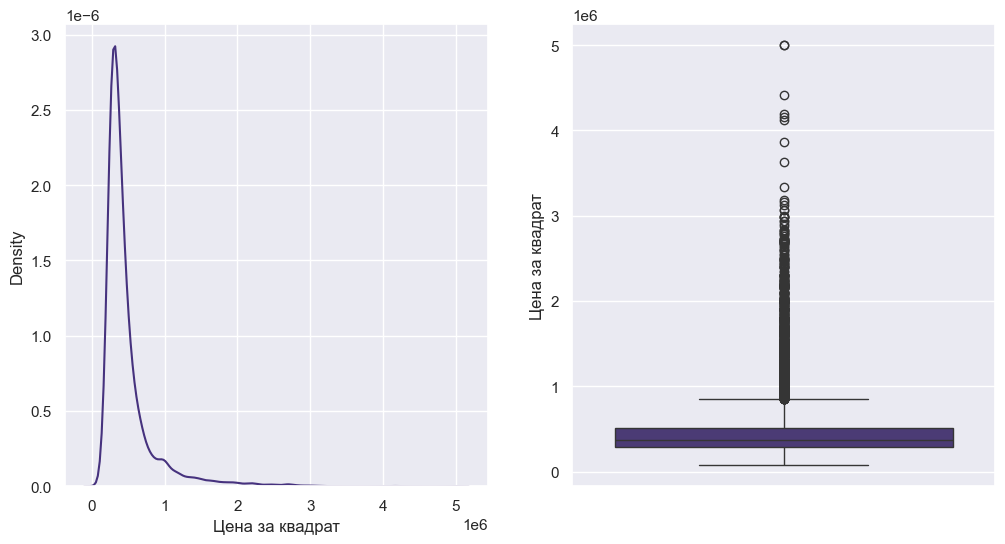

In [7]:
fig, axes = plt.subplots(1, 2)
sns.kdeplot(df["Цена за квадрат"], ax=axes[0])
sns.boxplot(df["Цена за квадрат"], ax=axes[1])
plt.show()

Распределение ненормальное, попробуем прологарифмировать целевой признак.

In [8]:
df['Цена за квадрат лог'] = np.log(df['Цена за квадрат'])

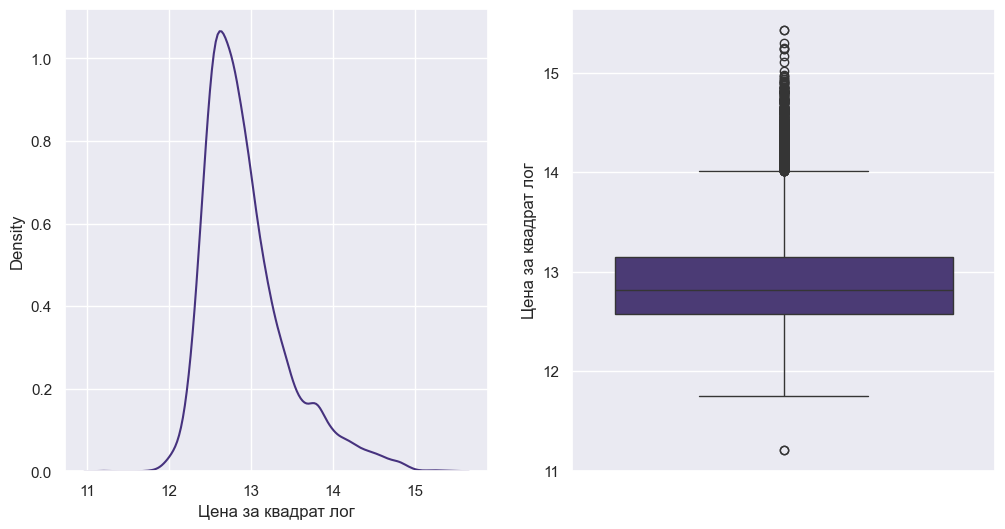

In [9]:
fig, axes = plt.subplots(1, 2)
sns.kdeplot(df["Цена за квадрат лог"], ax=axes[0])
sns.boxplot(df["Цена за квадрат лог"], ax=axes[1])
plt.show()

Прологарифмированный признак более приближен к нормальному. Будем работать с ним. Также есть выбросы, уберем выбросы по нижней границе через IQR.

In [10]:
data = df["Цена за квадрат лог"].copy()
Q1 = data.quantile(q=0.25)
Q3 = data.quantile(q=0.75)
IQR = stats.iqr(data)

In [11]:
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print(lower_bound, upper_bound)

11.718254749118973 14.009938623368793


In [12]:
df[(df["Цена за квадрат лог"] < lower_bound)]

,Название,Адрес,Метро,Время до метро,Цена,Цена за квадрат,Общая площадь,Жилая площадь,Площадь кухни,Этаж,...,Этажность здания,Кол-во комнат,широта метро,долгота метро,широта дома,долгота дома,Расстояние до центра,Расстояние до метро,Округ,Цена за квадрат лог
691,"2-комн. апартаменты, 86,9 м²","Москва, ЦАО, р-н Мещанский, 2-й Троицкий пер.,...",Цветной бульвар,9,6400000.0,73648.0,86.9,51.271,10.0,1,...,6,2,55.771758,37.620734,55.776472,37.622378,2.548472,0.534890,ЦАО,11.207052
10746,"1-комн. квартира, 72,1 м²","Москва, СЗАО, р-н Покровское-Стрешнево, ул. Св...",Тушинская,14,5300000.0,73509.0,72.1,18.400,8.0,1,...,5,1,55.826554,37.436993,55.824162,37.451923,13.201157,0.972882,СЗАО,11.205163


In [13]:
df[(df["Цена за квадрат лог"] > upper_bound)]

,Название,Адрес,Метро,Время до метро,Цена,Цена за квадрат,Общая площадь,Жилая площадь,Площадь кухни,Этаж,...,Этажность здания,Кол-во комнат,широта метро,долгота метро,широта дома,долгота дома,Расстояние до центра,Расстояние до метро,Округ,Цена за квадрат лог
2,"4-комн. апартаменты, 207,9 м²","Москва, ЦАО, р-н Тверской, ул. Охотный Ряд, 2",Охотный ряд,2,454889566.0,2188021.0,207.9,122.661,35.343,5,...,15,4,55.756969,37.615524,55.757131,37.617114,0.464192,0.101442,ЦАО,14.598508
3,"4-комн. апартаменты, 204,6 м²","Москва, ЦАО, р-н Тверской, ул. Охотный Ряд, 2",Охотный ряд,2,508714883.0,2486388.0,204.6,120.714,34.782,6,...,15,4,55.756969,37.615524,55.757131,37.617114,0.464192,0.101442,ЦАО,14.726342
4,"5-комн. квартира, 264,6 м²","Москва, ЦАО, р-н Тверской, ул. Большая Дмитров...",Театральная,5,450000000.0,1700680.0,264.6,156.114,30.000,7,...,7,5,55.757967,37.619001,55.760849,37.614743,0.898965,0.417634,ЦАО,14.346539
5,"3-комн. квартира, 146 м²","Москва, ЦАО, р-н Тверской, ул. Большая Дмитров...",Чеховская,8,184000000.0,1260274.0,146.0,86.140,24.820,3,...,6,3,55.765843,37.608167,55.762080,37.614186,1.037851,0.564167,ЦАО,14.046840
7,"5-комн. квартира, 296,4 м²","Москва, ЦАО, р-н Тверской, ул. Большая Дмитров...",Театральная,4,450000000.0,1518219.0,296.4,174.876,50.388,7,...,7,5,55.757967,37.619001,55.760849,37.614743,0.898965,0.417634,ЦАО,14.233048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10518,"1-комн. апартаменты, 29,7 м²","Москва, САО, р-н Хорошевский, Хорошевское ш., 38",Беговая,8,87318000.0,2940000.0,29.7,17.523,5.049,5,...,5,1,55.773707,37.546004,55.776502,37.537119,5.852195,0.638536,САО,14.893920
10534,"2-комн. квартира, 67,4 м²","Москва, ЦАО, р-н Басманный, Потаповский пер., 6",Чистые пруды,6,99990000.0,1483531.0,67.4,40.000,10.000,2,...,5,2,55.764794,37.638692,55.761208,37.640363,1.480394,0.412806,ЦАО,14.209936
10566,"2-комн. квартира, 78 м²","Москва, ЦАО, р-н Хамовники, ул. Усачева, 11Б",Спортивная,9,118000000.0,1512821.0,78.0,37.000,12.900,9,...,13,2,55.723328,37.564123,55.727729,37.572297,4.202749,0.709849,ЦАО,14.229487
10581,"4-комн. квартира, 246 м²","Москва, ЦАО, р-н Хамовники, пер. Хилков, 1",Парк Культуры,6,489122149.0,1988301.0,246.0,180.000,20.000,2,...,7,4,55.735307,37.592869,55.736686,37.599328,2.324215,0.433815,ЦАО,14.502791


In [14]:
df_clean = df[df["Цена за квадрат лог"] > lower_bound]

In [15]:
df_clean.reset_index(drop=True, inplace=True)

In [16]:
df_clean.to_csv('data\cian_final.csv', index=False)

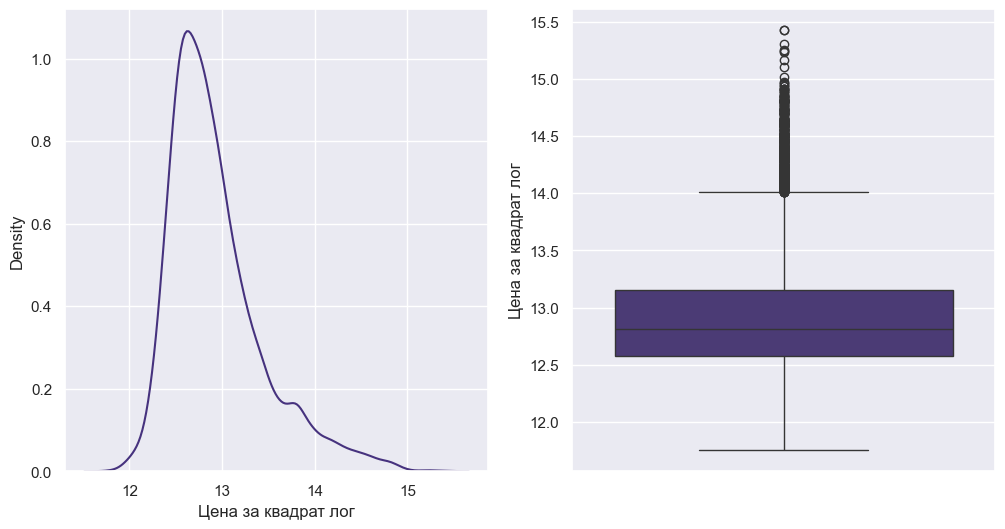

In [17]:
fig, axes = plt.subplots(1, 2)
sns.kdeplot(df_clean["Цена за квадрат лог"], ax=axes[0])
sns.boxplot(df_clean["Цена за квадрат лог"], ax=axes[1])
plt.show()

# EDA Анализ

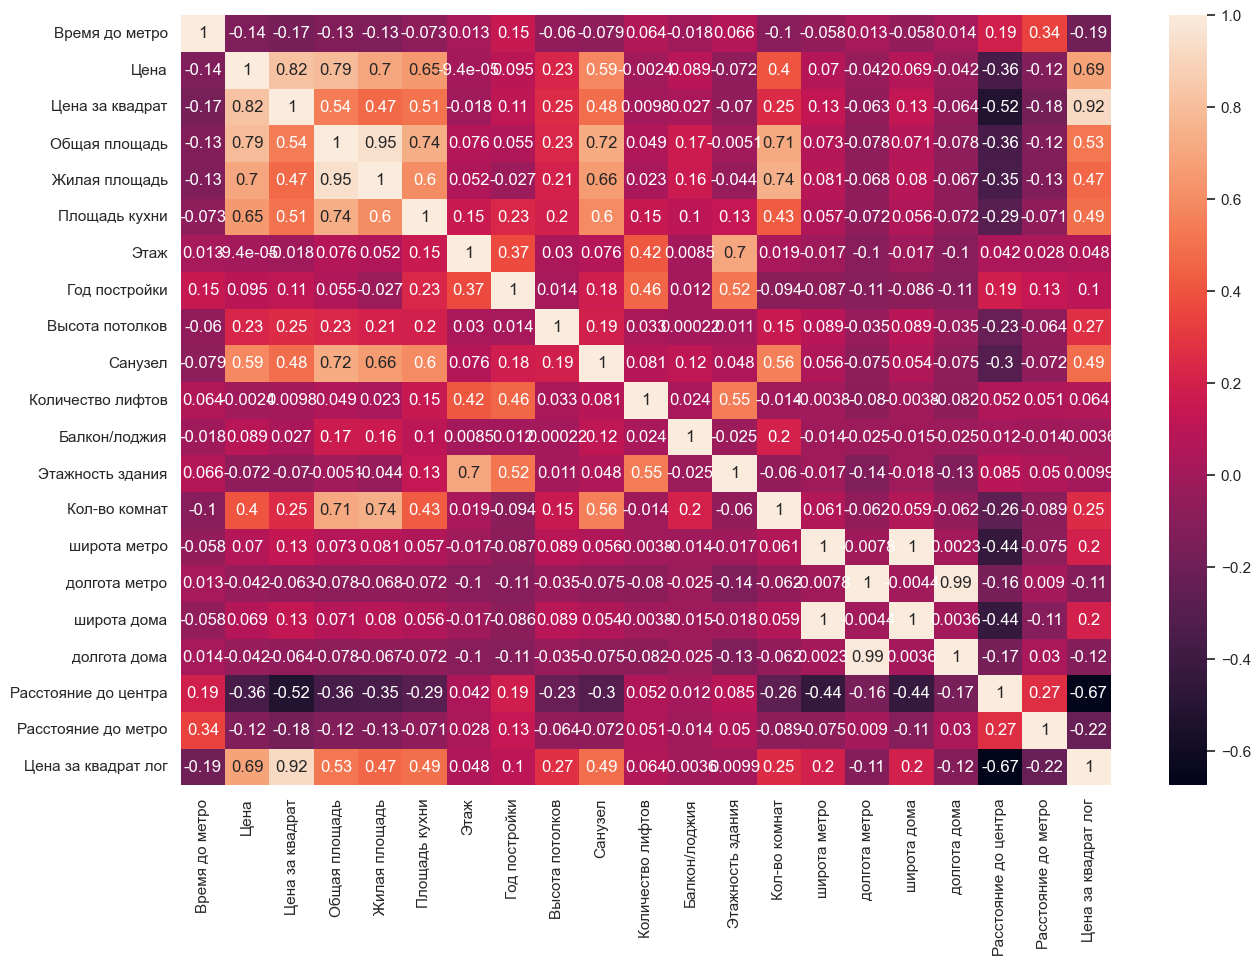

In [18]:
plt.figure(figsize=(15, 10))

sns.heatmap(df_clean.corr(numeric_only=True), annot=True)
plt.show()

**Гипотезы:**

- 1. Между расстоянием до метро и ценой за квадрат есть корреляция. Чем меньше расстояние до метро, тем выше цена за квадрат.
- 2. Между расстоянием до центра Москвы и ценой за квадрат есть корреляция. Чем меньше расстояние до центра Москвы, тем выше цена за квадрат.
- 3. Между площадью кухни и ценой за квадрат есть корреляция. Чем больше площадь кухни, тем выше цена за квадрат.
- 4. Квартиры на первом и последнем этаже стоят дешевле чем на других этажах.  
- 5. Между этажностью здания и ценой за квадрат есть корреляция. Чем меньше этажность здания тем дешевле будут квартиры.
- 6. Цена за квадрат квартир у которых подземная или многоуровневая парковка выше.
- 7. Цена за квадрат квартир в монолитно-кирпичных и кирпичных домах выше чем у других.
- 8. Между годом постройки и расстоянием до метро есть корреляция. У новых домов расстояние будет меньше.
- 9. Между ремонтом и расстоянием до центра есть корреляция. У квартир которые находятся ближе к центру, будет чаще встречаться дизайнерский ремонт.
- 10. Квартиры в новостройках дороже чем на вторичном рынке.
- 11. Между этажностью и количеством лифтов есть корреляция. Чем больше этажность тем больше лифтов.
- 12. Квартиры с более высокими потолками будут дороже.
 

## 1 Гипотеза. Чем меньше расстояние до метро, тем выше цена за квадрат.

H0: Между расстоянием до метро и ценой за квадрат нет корреляции.<br>
H1: Между расстоянием до метро и ценой за квадрат есть корреляция.

In [19]:
def check_ttest(a: pd.Series, popmean: float, alt: str):
    t_stat, p_value = stats.ttest_1samp(a=a, popmean=popmean, alternative=alt)
    print("Statistic:", t_stat)
    print("p-value:", p_value)
    if alpha < p_value:
        print("H0 не отвергается")
    else:
        print("H0 отвергается")

In [20]:
def check_corr(a: pd.Series, b: pd.Series):
    correlation, p_value = stats.spearmanr(a, b)
    print("Коэффициент корреляции:", correlation)
    print("p-значение:", p_value)
    if alpha < p_value:
        print('H0 не отвергается')
    else:
        print('H0 отвергается')

In [21]:
alpha = 0.05

Коэффициент корреляции: -0.32332124888321373
p-значение: 2.095827809750911e-260
H0 отвергается


C:\Users\ser34\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


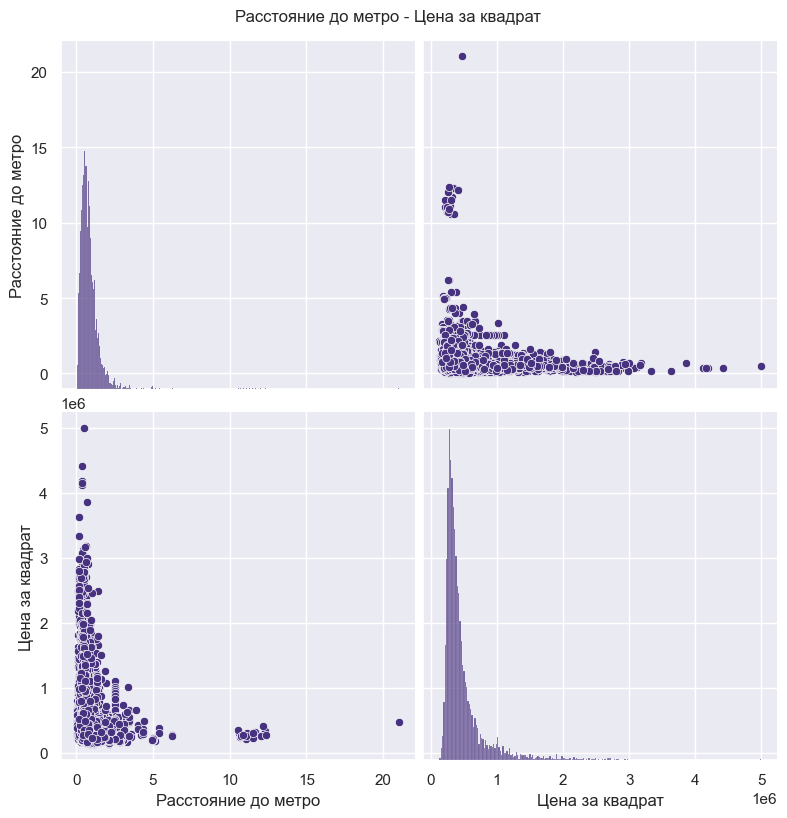

In [22]:
check_corr(df_clean['Расстояние до метро'], df_clean['Цена за квадрат'])

sns.pairplot(df_clean[['Расстояние до метро', 'Цена за квадрат']], size=4, )
plt.title('Расстояние до метро - Цена за квадрат', y=2.1, x=-0.1)
plt.show()

<div class="alert alert-block alert-success" > 
<b>Вывод:</b><br>
Между признаками есть корреляция, но совсем небольшая. Зато мы видим, что большинство квартир продаются близко к метро, так как в Москве на данный момент сильно развит метрополитен.
</div>

## 2 Гипотеза. Чем меньше расстояние до центра Москвы, тем выше цена за квадрат.

H0: Между расстоянием до центра Москвы и ценой за квадрат нет корреляции.<br>
H1:Между расстоянием до центра Москвы и ценой за квадрат есть корреляцияя.

Коэффициент корреляции: -0.7524666658371604
p-значение: 0.0
H0 отвергается


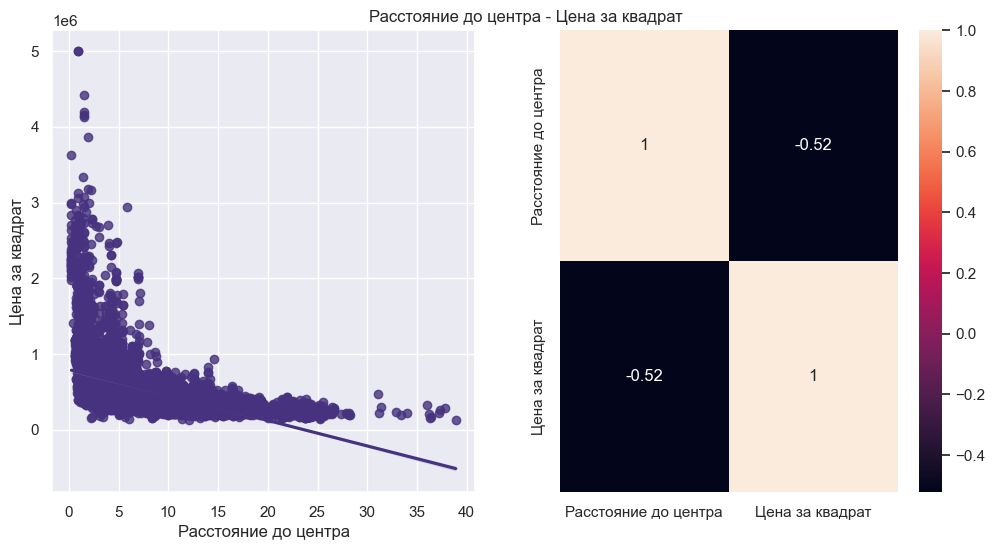

In [23]:
check_corr(df_clean["Расстояние до центра"], df_clean["Цена за квадрат"])

fig, axes = plt.subplots(1, 2)
sns.regplot(x=df_clean["Расстояние до центра"],
            y=df_clean["Цена за квадрат"], ax=axes[0], marker='o')
sns.heatmap(
    data=(df_clean[["Расстояние до центра", "Цена за квадрат"]]).corr(), annot=True)

plt.title('Расстояние до центра - Цена за квадрат', x=-0.1)

plt.show()

<div class="alert alert-block alert-success" > 
<b>Вывод:</b><br>
Между признаками есть достаточно сильная корреляция. Цена за 1 квадратный метр ближе к центру города выше.
</div>

## 3 Гипотеза. Чем больше площадь кухни, тем выше цена за квадрат.

H0: Между площадью кухни и ценой за квадрат нет корреляции.<br>
H1: Между площадью кухни и ценой за квадрат есть корреляция.

Коэффициент корреляции: 0.38754984778824436
p-значение: 0.0
H0 отвергается


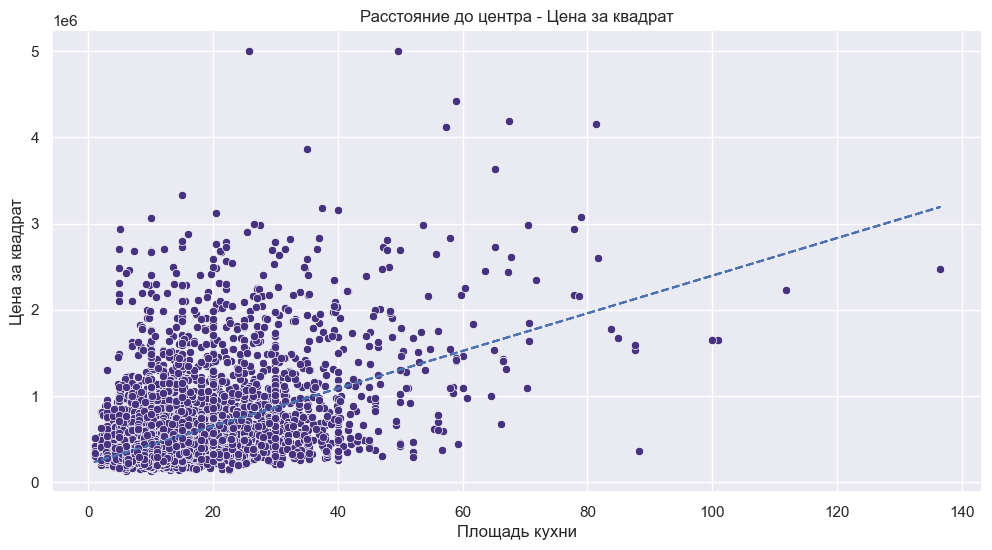

In [24]:
check_corr(df_clean["Площадь кухни"], df_clean["Цена за квадрат"])

sns.scatterplot(x=df_clean["Площадь кухни"],
                y=df_clean["Цена за квадрат"])

z = np.polyfit(df_clean["Площадь кухни"], df_clean["Цена за квадрат"], 1)
p = np.poly1d(z)
plt.plot(df_clean["Площадь кухни"], p(df_clean["Площадь кухни"]), "b--")
plt.title('Расстояние до центра - Цена за квадрат')

plt.show()

<div class="alert alert-block alert-success" > 
<b>Вывод:</b><br>
Наблюдаем среднюю положительную корреляцию между площадью кухни и ценой за квадратный метр. Чем больше площадь кухни тем выше и цена.
</div>

## 4 Гипотеза. Квартиры на первом и последнем этаже стоят дешевле чем на других этажах.

H0: Квартиры на первом и последнем этаже стоят дешевле чем на других этажах.<br>
H1: Квартиры на первом и последнем этаже стоят дороже чем на других этажах.

In [25]:
fl_floor = df_clean[(df_clean['Этаж'] == 1) | (
    df_clean['Этаж'] == df_clean['Этажность здания'])]['Цена за квадрат']

In [26]:
other_floor = df_clean.drop(fl_floor.index)[['Цена за квадрат']]

In [27]:
check_ttest(fl_floor, other_floor.mean(), 'greater')

Statistic: -0.3381277923503025
p-value: 0.632347057185852
H0 не отвергается


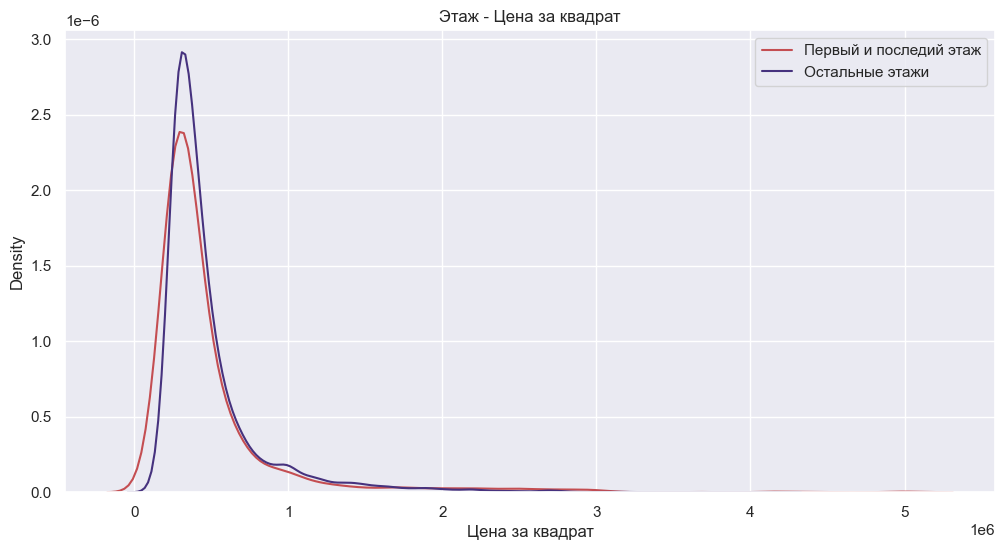

In [28]:
sns.kdeplot(fl_floor, color='r', common_norm=False)
sns.kdeplot(other_floor, common_norm=False)

plt.title('Этаж - Цена за квадрат')
plt.legend(labels=['Первый и последий этаж', 'Остальные этажи'])
plt.show()

<div class="alert alert-block alert-success" > 
<b>Вывод:</b><br>
Гипотеза подтвердилась. Цена за квадрат квартир на первом и последнем этаже ниже чем у остальных. В первом случае из-за подвала и высокого уровня шума с улицы. В втором случае из-за возможных протечек крыши.
</div>

## 5 Гипотеза. Чем меньше этажность здания тем дешевле будут квартиры.

H0: Между этажностью здания и ценой за квадрат нет корреляции.<br>
H1: Между этажностью здания и ценой за квадрат есть корреляция.

Коэффициент корреляции: -0.01383230006164161
p-значение: 0.15126840005283795
H0 не отвергается


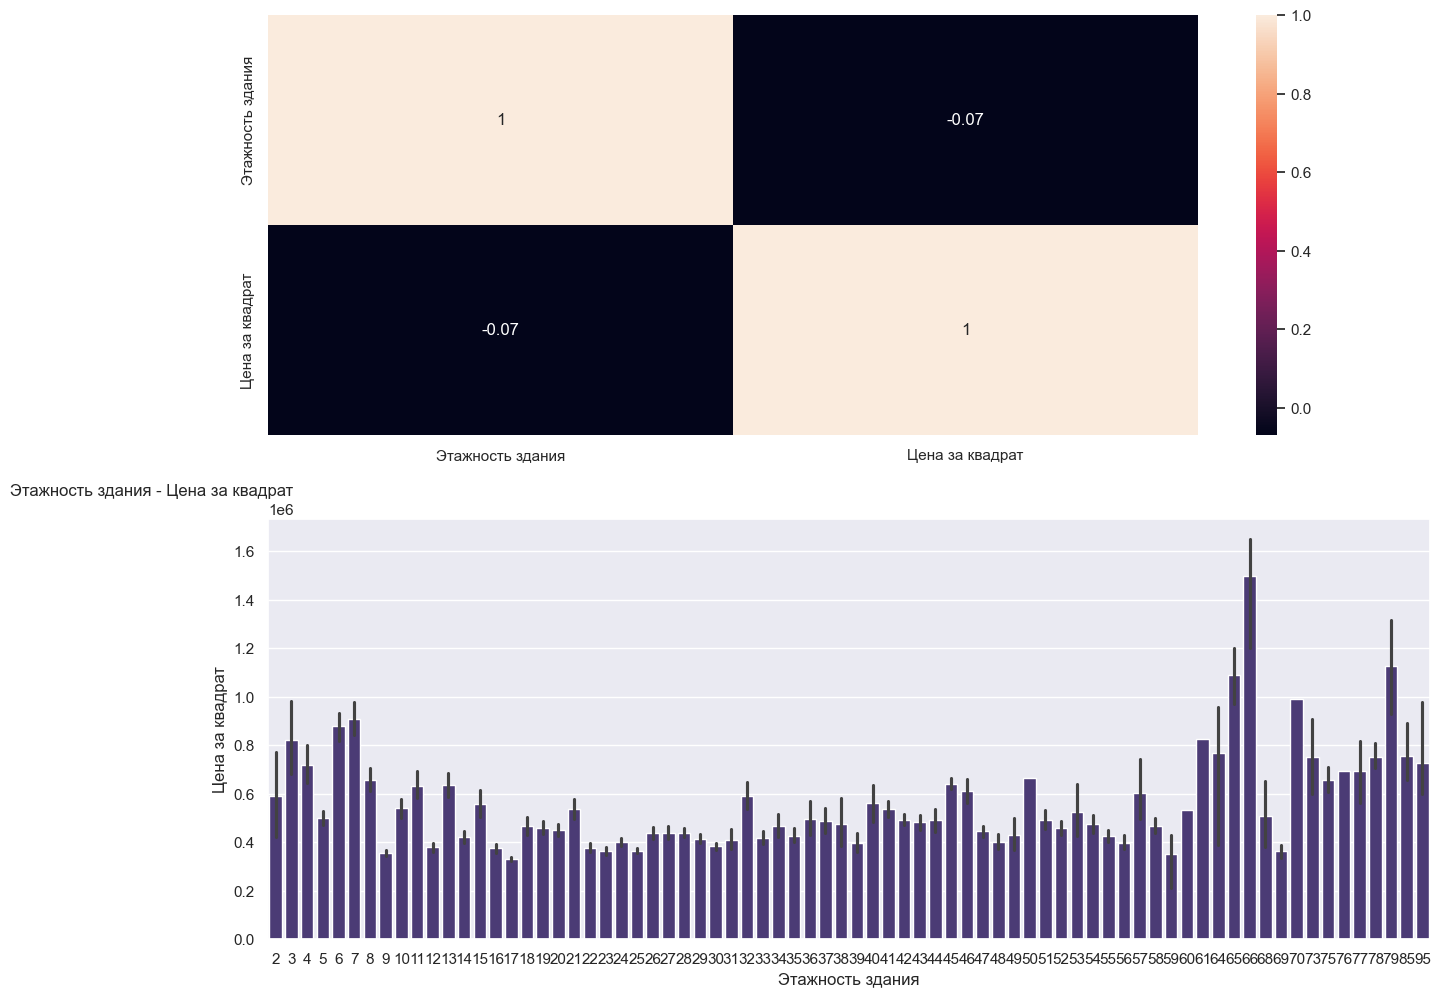

In [29]:
check_corr(df_clean["Этажность здания"], df_clean["Цена за квадрат"])

fig, axes = plt.subplots(2, 1, figsize=(15, 12))

sns.heatmap(df_clean[['Этажность здания', 'Цена за квадрат']
                     ].corr(), annot=True, ax=axes[0])
sns.barplot(df_clean, x='Этажность здания', y='Цена за квадрат', ax=axes[1])

plt.title('Этажность здания - Цена за квадрат', x=-.1)
plt.show()

<div class="alert alert-block alert-success" > 
<b>Вывод:</b><br>
Гипотеза не подтвердилась. Корреляции между Этажностью здания и ценой за квадрат нет.

## 6 Гипотеза. Цена за квадрат квартир у которых подземная или многоуровневая парковка выше.

H0: Цена за квадратный метр квартир c подземной или многоуровневой парковкой выше чем у других.<br>
H1: Цена за квадратный метр квартир c подземной или многоуровневой парковкой ниже чем у других.

Statistic: 26.93137311027277
p-value: 1.0
H0 не отвергается


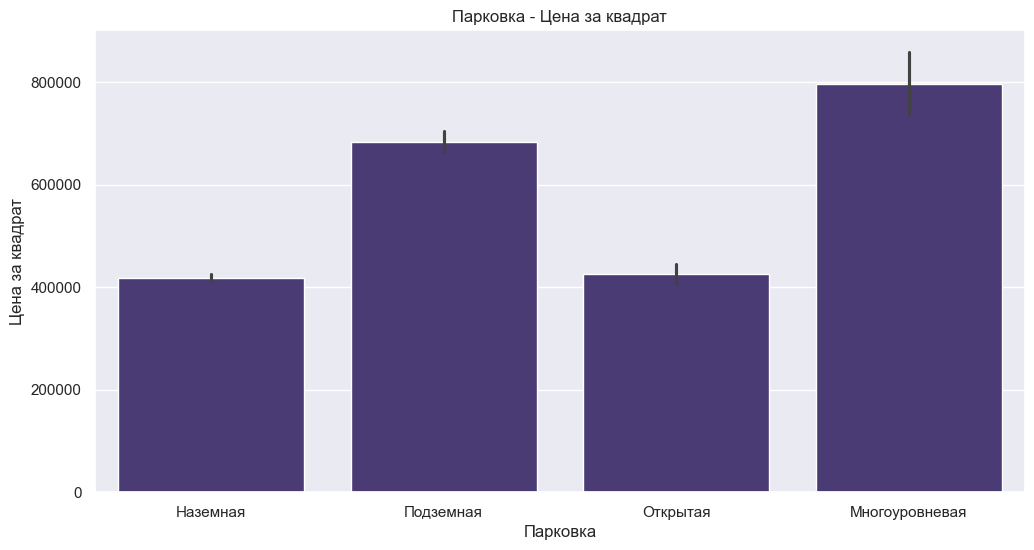

In [30]:
parking = df_clean[(df_clean['Парковка'] == 'Подземная') | (
    df_clean['Парковка'] == 'Многоуровневая')]['Цена за квадрат']
check_ttest(parking, df_clean.drop(parking.index)
            ['Цена за квадрат'].mean(), 'less')

sns.barplot(data=df_clean, x='Парковка', y='Цена за квадрат')

plt.title('Парковка - Цена за квадрат')
plt.show()

<div class="alert alert-block alert-success" > 
<b>Вывод:</b><br>
Гипотеза подтвердилась. Квартиры в домах с подземной или многоуровневой парковкой дороже чем остальные. Связано с тем, что машина в любое время года находится в теплом, закрытом помещении. И нет необходимости зимой тратить время на прогрев машины и очистку от снега в зимнее время.
</div>

## 7 Гипотеза. Цена за квадрат у квартир в монолитно-кирпичных и кирпичных домах выше чем у других.

H0: Цена за квадратный метр у квартир в монолитно-кирпичных и кирпичных домах выше чем у других.<br>
H1:Цена за квадратный метр у квартир в монолитно-кирпичных и кирпичных домах выше чем у других..

In [31]:
df_clean['Тип дома'].value_counts()

Тип дома
Монолитный             5960
Кирпичный              2197
Панельный              1721
Монолитно-кирпичный     463
Блочный                 408
Сталинский               15
Старый фонд               1
Name: count, dtype: int64

Statistic: 8.682158332506573
p-value: 1.0
H0 не отвергается


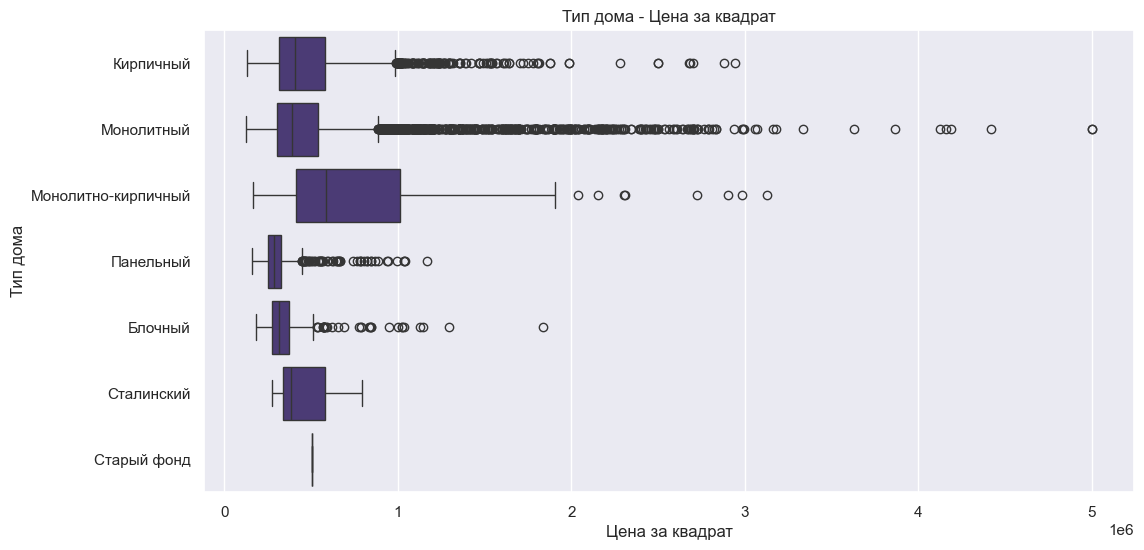

In [32]:
house_type = df_clean[(df_clean['Тип дома'] == 'Монолитно-кирпичный')
                      | (df_clean['Тип дома'] == 'Кирпичный')]['Цена за квадрат']
check_ttest(house_type, df_clean['Цена за квадрат'].mean(), 'less')

sns.boxplot(df_clean, y='Тип дома', x='Цена за квадрат', orient='h')

plt.title('Тип дома - Цена за квадрат')
plt.show()

<div class="alert alert-block alert-success" > 
<b>Вывод:</b><br>
Гипотеза подтвердилась. Квартиры в монолитно-кирпичных домах дороже чем в других. У этих домов самый высокий срок эксплуатации, хорошая звуко-изоляция, и эта технология позволяет возводить дома разных форм.
</div>

## 8 Гипотеза. Между годом постройки и расстоянием до метро есть корреляция. У новых домов расстояние будет меньше.

H0: Между годом постройки и расстоянием до метро нет корреляции.<br>
H1: Между годом постройки и расстоянием до метро есть корреляция.

Коэффициент корреляции: 0.1643168010817381
p-значение: 4.989564616803094e-66
H0 отвергается


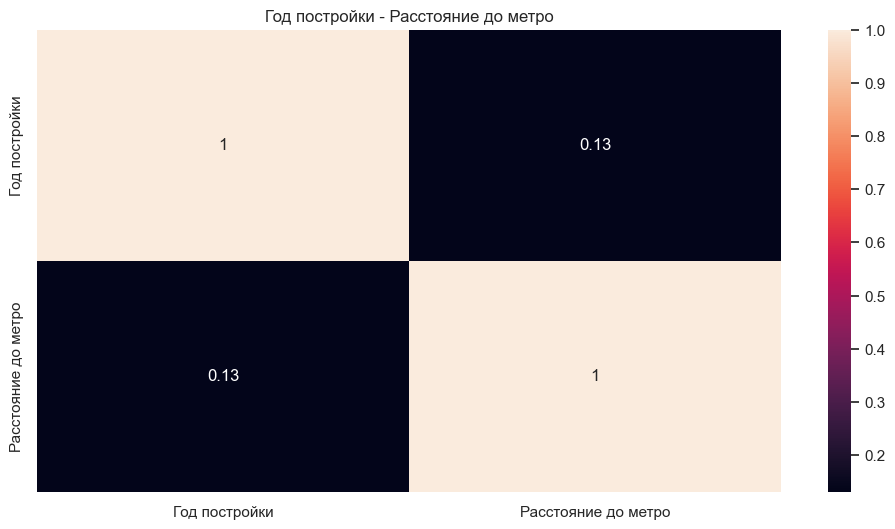

In [33]:
check_corr(df_clean["Год постройки"], df_clean["Расстояние до метро"])

sns.heatmap(
    df_clean[['Год постройки', 'Расстояние до метро']].corr(), annot=True)
plt.title('Год постройки - Расстояние до метро')
plt.show()

<div class="alert alert-block alert-success" > 
<b>Вывод:</b><br>
Между годом постройки и расстоянием до метро есть корреляция. У новых домов расстояние меньше. Связано с тем, что раньше метрополитен не был так развит, и при строительстве особо не учитывалось наличие метро рядом. Это одна из причин почему с каждым годом квартиры становятся дороже.
</div>

## 9 Гипотеза. Между ремонтом и расстоянием до центра есть корреляция. У квартир которые находятся ближе к центру, будет чаще встречаться дизайнерский ремонт.

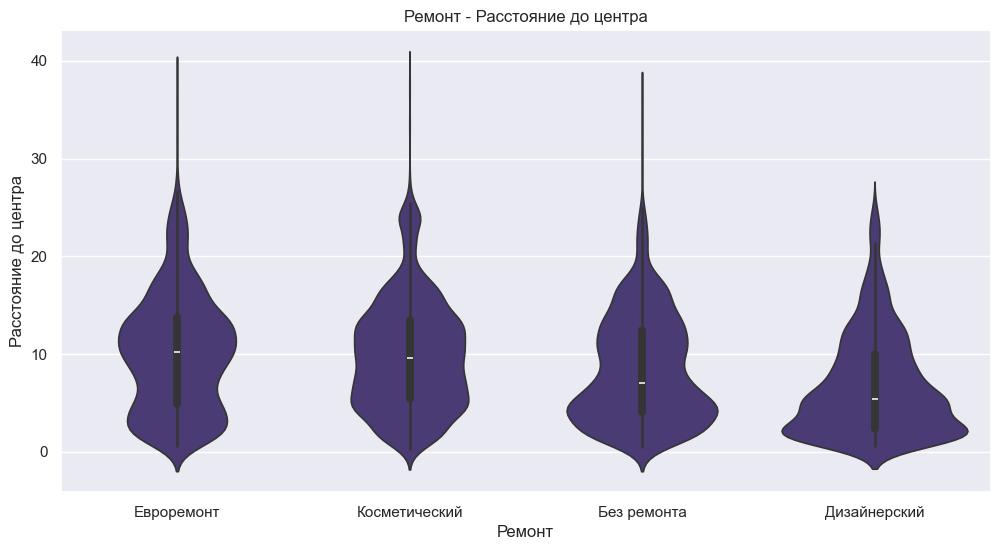

In [34]:
sns.violinplot(df_clean, x='Ремонт', y='Расстояние до центра')
plt.title('Ремонт - Расстояние до центра')
plt.show()

<div class="alert alert-block alert-success" > 
<b>Вывод:</b><br>
Между ремонтом и расстоянием до центра есть корреляция. У квартир которые находятся ближе к центру, чаще встречается дизайнерский ремонт. Помимо исторически значимой архитектуры в центре города, дизайнерский ремонт так же влияет на общую динамику цен ближе к центру Москвы.
</div>

## 10 Гипотеза. Квартиры в новостройках дороже чем на вторичном рынке.

H0: Цена за квадратный метр у квартир на вторичном рынке ниже чем средняя цена по рынку.<br>
H1: Цена за квадратный метр у квартир на вторичном рынке выше чем средняя цена по рынку.

In [35]:
df_clean['Тип жилья'].value_counts()

Тип жилья
Вторичка       9036
Новостройка    1729
Name: count, dtype: int64

Statistic: -7.000393000155329
p-value: 0.9999999999986328
H0 не отвергается


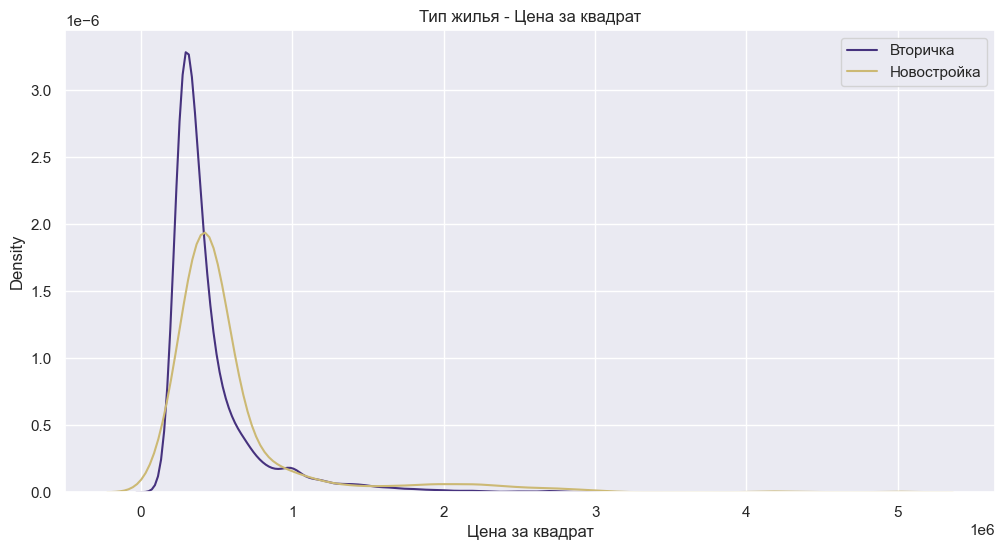

In [36]:
vtor = df_clean[df_clean['Тип жилья'] == 'Вторичка']['Цена за квадрат']
check_ttest(vtor, df_clean['Цена за квадрат'].mean(), 'greater')

sns.kdeplot(vtor)
sns.kdeplot(df_clean.drop(vtor.index)['Цена за квадрат'], color='y')
plt.title('Тип жилья - Цена за квадрат')
plt.legend(labels=['Вторичка', 'Новостройка'])
plt.show()

<div class="alert alert-block alert-success" > 
<b>Вывод:</b><br>
Гипотеза подтвердилась. В новостройках цены на квартиры выше. На это вляют многие факторы, некоторые из них мы уже посмотрели. Например: связь года постройки и расстояния до метро и связь этажности здания и цены за квадратный метр.
</div>

## 11 Гипотеза: Между этажностью и количеством лифтов есть корреляция. Чем больше этажность тем больше лифтов.

H0: Между этажностью и количеством лифтов нет корреляция.<br>
H1: Между этажностью и количеством лифтов есть корреляции.

Коэффициент корреляции: 0.789499192426355
p-значение: 0.0
H0 отвергается


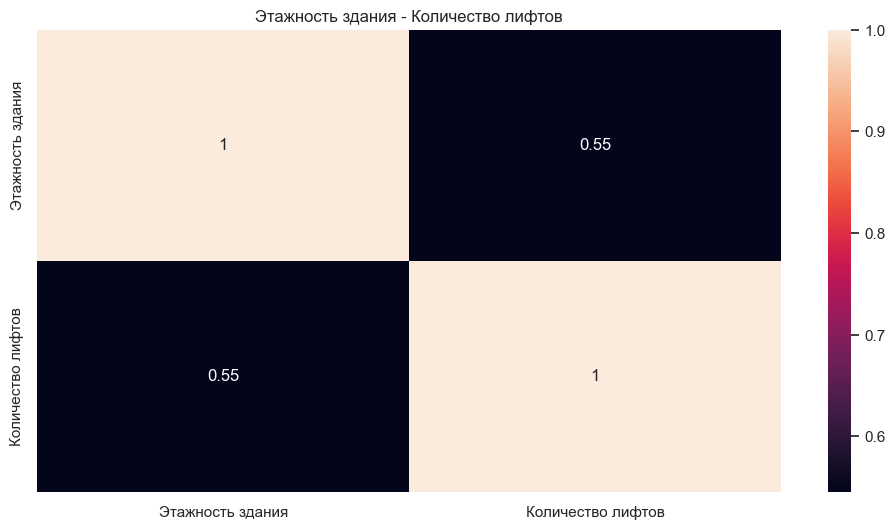

In [37]:
check_corr(df_clean['Этажность здания'], df_clean['Количество лифтов'])

sns.heatmap(
    df_clean[['Этажность здания', 'Количество лифтов']].corr(), annot=True)
plt.title('Этажность здания - Количество лифтов')
plt.show()

<div class="alert alert-block alert-success" > 
<b>Вывод:</b><br>
Гипотеза подтвердилась. Наблюдаем среднюю положительную корреляцию. По ГОСТу для определенной этажности здания необходимо устанавливать определенное количество лифтов.
</div>



## 12 Гипотеза: Квартиры с более высокими потолками будут дороже.

H0: Между высотой потолков и ценой за квадрат нет корреляция.<br>
H1: Между высотой потолков и ценой за квадрат есть корреляции.

In [38]:
check_corr(df_clean['Высота потолков'], df_clean['Цена за квадрат'])

Коэффициент корреляции: 0.5502043224734383
p-значение: 0.0
H0 отвергается


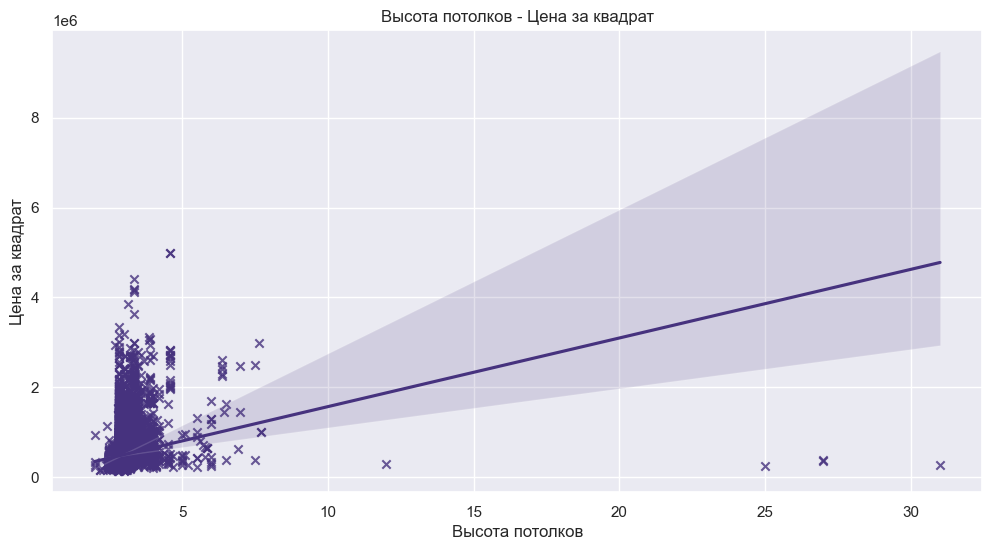

In [39]:
sns.regplot(x=df_clean["Высота потолков"],
            y=df_clean["Цена за квадрат"], marker='x')

plt.title('Высота потолков - Цена за квадрат')
plt.show()

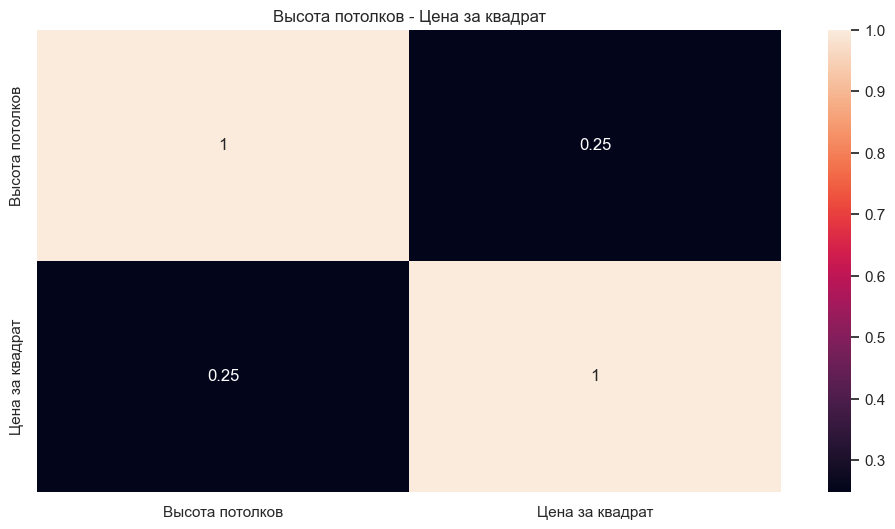

In [40]:
sns.heatmap(
    df_clean[['Высота потолков', 'Цена за квадрат']].corr(), annot=True)

plt.title('Высота потолков - Цена за квадрат')
plt.show()

<div class="alert alert-block alert-success" > 
<b>Вывод:</b><br>
Гипотеза подтвердилась. Наблюдаем среднюю положительную корреляцию. Чем выше потолки тем выше будет цена за квадрат.
</div>
